In [126]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Data prep

In [127]:
df = pd.read_csv("./filez/iris.csv")
df.columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "target",
]
df["target"] = df["target"].apply(int)
y = to_categorical(df["target"], num_classes=3)
X = df.drop("target", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=98
)

## NN Model

In [128]:
def evaluate_nn_sequential(model):
    y_pred = model.predict(X_test)
    y_pred_classes = tf.argmax(y_pred, axis=1)
    y_test_classes = tf.argmax(y_test, axis=1)

    print(confusion_matrix(y_test_classes, y_pred_classes))
    print(classification_report(y_test_classes, y_pred_classes))

In [129]:
def nn_sequential(epochs: int = 50, batch_size: int = 10, patience: int = 10):
    model = Sequential()
    model.add(Dense(10, input_dim=4, activation="relu"))
    model.add(Dense(20, activation="relu"))
    # model.add(Dropout(0.3))  # Add a dropout layer for regularization
    model.add(Dense(10, activation="relu"))
    model.add(Dense(3, activation="softmax"))
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )

    # Define early stopping callback
    early_stop = EarlyStopping(monitor="val_loss", patience=patience)

    # Fit the model with a portion of the training data reserved for validation
    model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        validation_split=0.1,
    )

    # Fit the model with a portion of the training data reserved for validation
    # This object includes loss and accuracy metrics recorded at the end of each epoch for both training and validation.
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        validation_split=0.1,
    )

    return model, history

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_accuracy(history):
    # Extracting the history data
    history_dict = history.history

    # Plotting
    plt.figure(figsize=(12, 5))

    # Subplot for the loss
    plt.subplot(1, 2, 1)
    sns.lineplot(
        data={
            "Training Loss": history_dict["loss"],
            "Validation Loss": history_dict["val_loss"],
        }
    )
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")

    # Subplot for the accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(
        data={
            "Training Accuracy": history_dict["accuracy"],
            "Validation Accuracy": history_dict["val_accuracy"],
        }
    )
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")

    plt.show()

In [131]:
model, history = nn_sequential(epochs=50, batch_size=10, patience=10)

Epoch 1/50


10/10 [==============================] - 0s 11ms/step - loss: 1.0722 - accuracy: 0.3723 - val_loss: 1.0679 - val_accuracy: 0.3636
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.9450 - accuracy: 0.3723 - val_loss: 0.9493 - val_accuracy: 0.3636
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8688 - accuracy: 0.3723 - val_loss: 0.8810 - val_accuracy: 0.3636
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.8238 - accuracy: 0.4149 - val_loss: 0.8387 - val_accuracy: 0.4545
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7923 - accuracy: 0.5000 - val_loss: 0.8045 - val_accuracy: 0.6364
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.5319 - val_loss: 0.7682 - val_accuracy: 0.5455
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.7356 - accuracy: 0.6170 - val_loss: 0.7383 - val_accuracy: 0.6364
Epoch 8/50
10/10 [============

`Epoch`: Indicates the current epoch number out of the total number of epochs (1/50, 2/50, ..., 50/50). An epoch is one complete pass through the entire training dataset.

`Progress Bar and Step`: The 10/10 [==============================] part shows the progress of training within each epoch. Here, 10/10 indicates that there are 10 batches in each epoch (determined by the training set size and batch size).

`Time per Step`: - 0s 2ms/step shows the time taken for each step (batch) in the epoch. For instance, 0s 2ms/step means each batch takes approximately 2 milliseconds to process.

`Loss and Accuracy`:
- loss: The training loss is a measure of the model's error on the training data. A lower loss indicates better performance. For example, loss: 0.9690 in the first epoch decreases to loss: 0.1434 by the 50th epoch, showing improvement.
- accuracy: The training accuracy is the proportion of correctly predicted examples in the training data. It increases from 0.6489 to 0.9894, indicating that the model is correctly classifying more training examples over time.

`Validation Loss and Accuracy` (val_loss, val_accuracy):
- These metrics are calculated on a validation set (a subset of the training data not used for training). They are crucial for evaluating the model's performance on unseen data.
- The validation loss and accuracy (val_loss: 0.8955, val_accuracy: 0.7273 in the first epoch) help assess overfitting. Ideally, both training and validation metrics should improve together. A significantly lower training loss compared to validation loss might indicate overfitting.

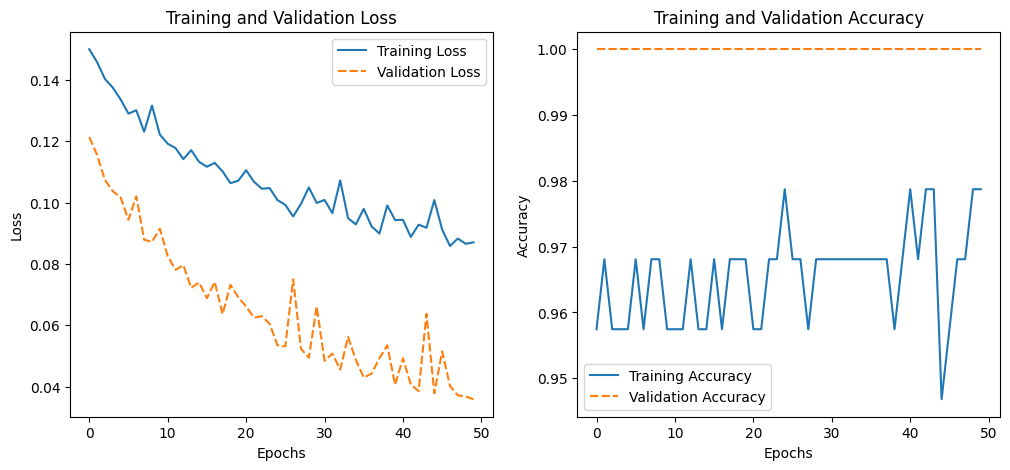

In [132]:
plot_accuracy(history)

In [133]:
evaluate_nn_sequential(model)

2/2 [==============================] - 0s 1ms/step
[[11  0  0]
 [ 0 18  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

